In [1]:
#to print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Set to 2 decimal places, and display all columns
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)

In [5]:
df = pd.read_csv('heart_disease.csv')
#from google.colab import drive
#drive.mount('/content/drive')

In [6]:
df1 = df.copy

### Data Description

In [7]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.00,1.00,1.00,1.00,40.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,5.00,18.00,15.00,1.00,0.00,9.00,4.00,3.00
1,0.00,0.00,0.00,0.00,25.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,3.00,0.00,0.00,0.00,0.00,7.00,6.00,1.00
2,0.00,1.00,1.00,1.00,28.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,5.00,30.00,30.00,1.00,0.00,9.00,4.00,8.00
3,0.00,1.00,0.00,1.00,27.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,2.00,0.00,0.00,0.00,0.00,11.00,3.00,6.00
4,0.00,1.00,1.00,1.00,24.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,2.00,3.00,0.00,0.00,0.00,11.00,5.00,4.00


In [8]:
print(df.shape)

(253680, 22)


In [9]:
df.columns.values

array(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits',
       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income'], dtype=object)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

Inference:


*  Data has only float values 
*  No variable column has null/missing values




### Data Cleaning

In [11]:
#Renaming Column names
df.rename(columns={'HeartDiseaseorAttack':'HeartDisease'}, inplace=True)
df.rename(columns={'HvyAlcoholConsump':'Alcohol'}, inplace=True)
df.rename(columns={'Smoker':'Smoke'}, inplace=True)
df.rename(columns={'AnyHealthcare':'Healthcare'}, inplace=True)
df.rename(columns={'NoDocbcCost':'DocCost'}, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   HeartDisease  253680 non-null  float64
 1   HighBP        253680 non-null  float64
 2   HighChol      253680 non-null  float64
 3   CholCheck     253680 non-null  float64
 4   BMI           253680 non-null  float64
 5   Smoke         253680 non-null  float64
 6   Stroke        253680 non-null  float64
 7   Diabetes      253680 non-null  float64
 8   PhysActivity  253680 non-null  float64
 9   Fruits        253680 non-null  float64
 10  Veggies       253680 non-null  float64
 11  Alcohol       253680 non-null  float64
 12  Healthcare    253680 non-null  float64
 13  DocCost       253680 non-null  float64
 14  GenHlth       253680 non-null  float64
 15  MentHlth      253680 non-null  float64
 16  PhysHlth      253680 non-null  float64
 17  DiffWalk      253680 non-null  float64
 18  Sex 

In [13]:
df.describe()

,HeartDisease,HighBP,HighChol,CholCheck,BMI,Smoke,Stroke,Diabetes,PhysActivity,Fruits,Veggies,Alcohol,Healthcare,DocCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00
mean,0.09,0.43,0.42,0.96,28.38,0.44,0.04,0.30,0.76,0.63,0.81,0.06,0.95,0.08,2.51,3.18,4.24,0.17,0.44,8.03,5.05,6.05
std,0.29,0.49,0.49,0.19,6.61,0.50,0.20,0.70,0.43,0.48,0.39,0.23,0.22,0.28,1.07,7.41,8.72,0.37,0.50,3.05,0.99,2.07
min,0.00,0.00,0.00,0.00,12.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00
25%,0.00,0.00,0.00,1.00,24.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,2.00,0.00,0.00,0.00,0.00,6.00,4.00,5.00
50%,0.00,0.00,0.00,1.00,27.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,2.00,0.00,0.00,0.00,0.00,8.00,5.00,7.00
75%,0.00,1.00,1.00,1.00,31.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,3.00,2.00,3.00,0.00,1.00,10.00,6.00,8.00
max,1.00,1.00,1.00,1.00,98.00,1.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,5.00,30.00,30.00,1.00,1.00,13.00,6.00,8.00


#### Key Observations:


*   Mean value is less than median value of each column represented by 50%(50th percentile) in index column.
*   Notably large differnece in 75th percentile and max values of predictors "Stroke", "Diabetes", "MentHlth",  "PhysHlth"
*   Thus observations 1 and 2 suggests that there are extreme values, Outliers in our dataset

In [14]:
df.HeartDisease.value_counts()

0.00    229787
1.00     23893
Name: HeartDisease, dtype: int64

This tells us how many people have heart disease/attack and how many do not. Many people do not have heart disease/attack compared to who have.

### Data Analysis

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

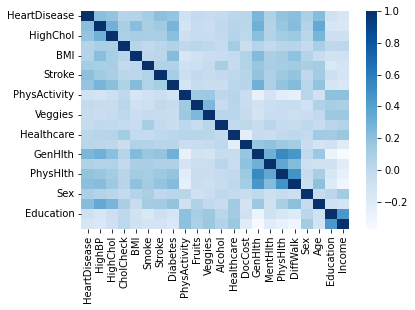

In [15]:
#Checking correlation
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(),cmap='Blues',annot=False)

<Figure size 1440x864 with 0 Axes>

<AxesSubplot:>

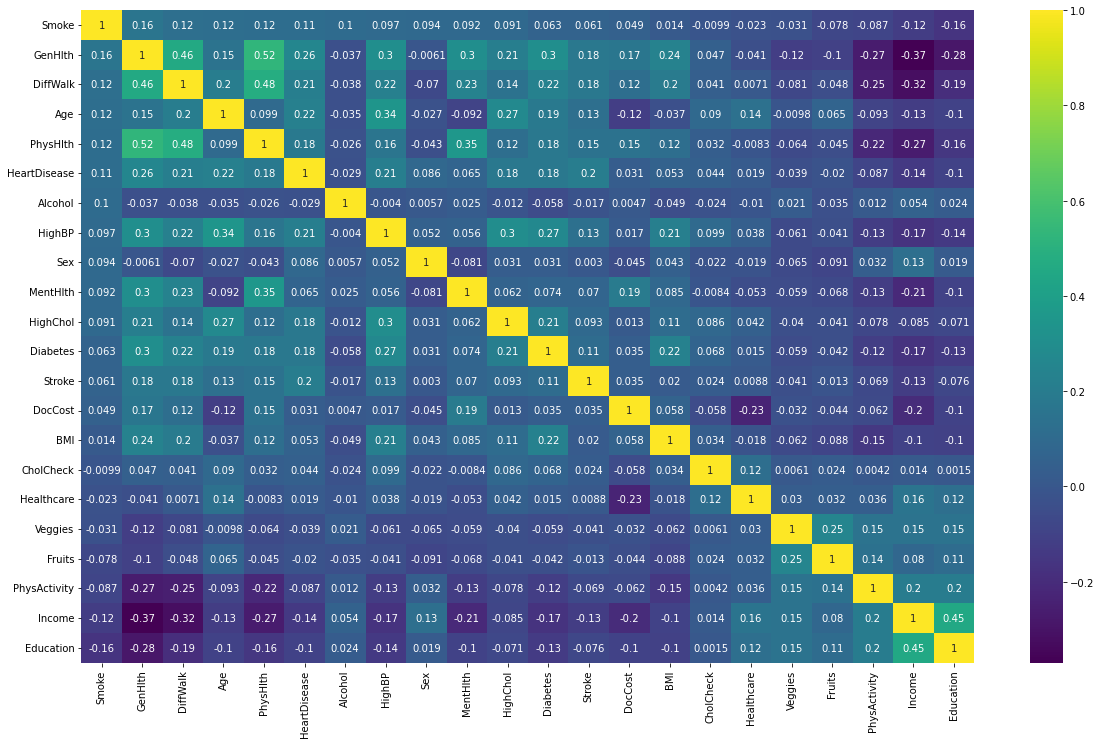

In [16]:
#Quality correlation matrix
k = 22 #number of variables for heatmap
cols = df.corr().nlargest(k, 'Smoke')['Smoke'].index
cm = df[cols].corr()
plt.figure(figsize=(20,12))
sns.heatmap(cm, annot=True, cmap = 'viridis')






*   Here we can infer that "PhysHlth" has strong positive correlation with "GenHlth" whereas it has strong negative correlation with "income".
*   "AnyHlthCare" and "NoDocBcCost" has almost no correlation with "HeartDiseaseorAttack"
*   Since correlation is zero we can infer there is no linear relationship between these two predictors.However it is safe to drop these features in case you're applying Linear Regression model to the dataset.



<AxesSubplot:xlabel='Age', ylabel='Count'>

<AxesSubplot:xlabel='MentHlth', ylabel='Count'>

<AxesSubplot:xlabel='PhysHlth', ylabel='Count'>

<AxesSubplot:xlabel='BMI', ylabel='Count'>

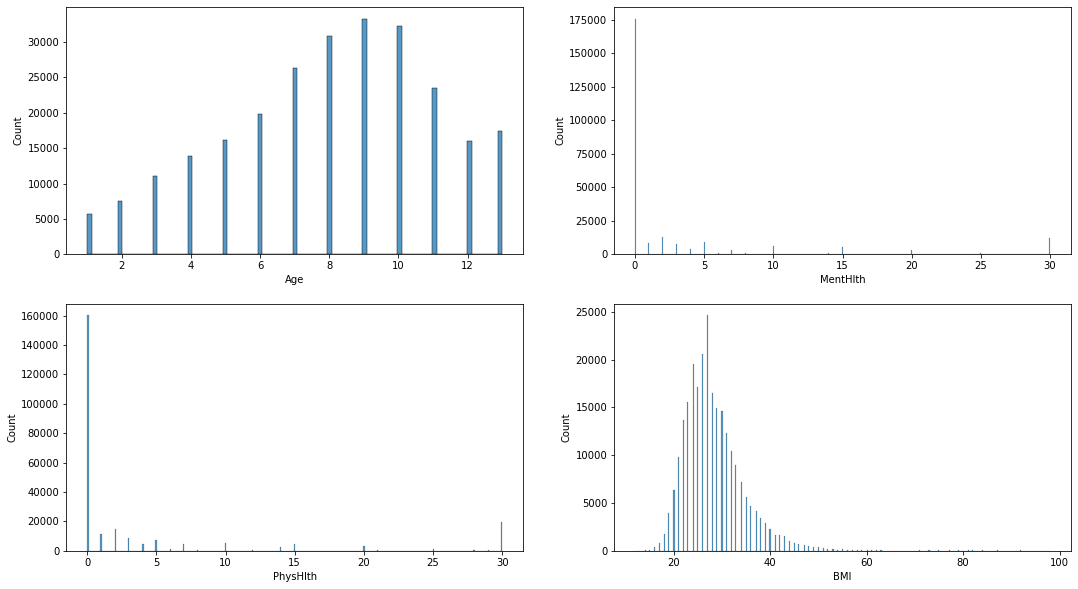

In [17]:
distcol = ['Age', 'MentHlth', 'PhysHlth', 'BMI']
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
sns.histplot(ax=axes[0,0], data=df, x=distcol[0])
sns.histplot(ax=axes[0,1], data=df, x=distcol[1])
sns.histplot(ax=axes[1,0], data=df, x=distcol[2])
sns.histplot(ax=axes[1,1], data=df, x=distcol[3])

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

<AxesSubplot:xlabel='HighBP', ylabel='count'>

<AxesSubplot:xlabel='HighChol', ylabel='count'>

<AxesSubplot:xlabel='CholCheck', ylabel='count'>

<AxesSubplot:xlabel='BMI', ylabel='count'>

<AxesSubplot:xlabel='Smoke', ylabel='count'>

<AxesSubplot:xlabel='Stroke', ylabel='count'>

<AxesSubplot:xlabel='Diabetes', ylabel='count'>

<AxesSubplot:xlabel='PhysActivity', ylabel='count'>

<AxesSubplot:xlabel='Fruits', ylabel='count'>

<AxesSubplot:xlabel='Veggies', ylabel='count'>

<AxesSubplot:xlabel='Alcohol', ylabel='count'>

<AxesSubplot:xlabel='Healthcare', ylabel='count'>

<AxesSubplot:xlabel='DocCost', ylabel='count'>

<AxesSubplot:xlabel='GenHlth', ylabel='count'>

<AxesSubplot:xlabel='MentHlth', ylabel='count'>

<AxesSubplot:xlabel='PhysHlth', ylabel='count'>

<AxesSubplot:xlabel='DiffWalk', ylabel='count'>

<AxesSubplot:xlabel='Sex', ylabel='count'>

<AxesSubplot:xlabel='Age', ylabel='count'>

<AxesSubplot:xlabel='Education', ylabel='count'>

<AxesSubplot:xlabel='Income', ylabel='count'>

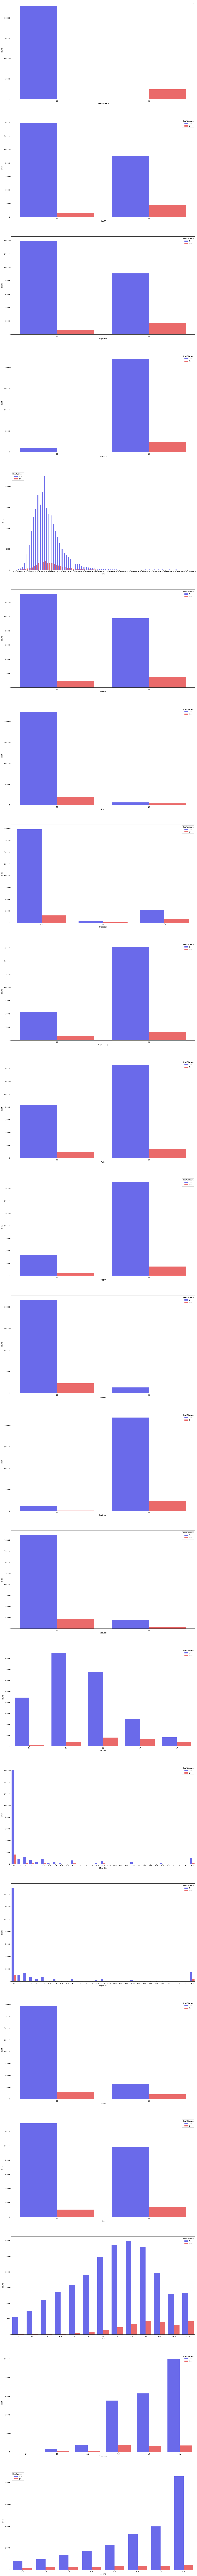

In [18]:
target="HeartDisease"

fig, axes = plt.subplots(nrows=df.shape[1], ncols=1, figsize=(20,13*df.shape[1]))
for i in range(len(df.columns)):
    col = df.columns[i]
    sns.countplot(x=col, data=df, hue=target, palette="seismic", ax=axes[i])
axes[0].legend([])
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Density'>

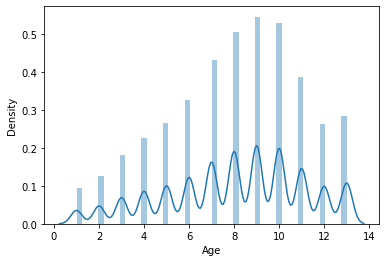

In [19]:
sns.distplot(df.Age)

<AxesSubplot:xlabel='Income', ylabel='Density'>

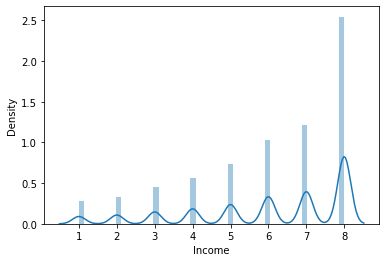

In [20]:
sns.distplot(df.Income)

<AxesSubplot:ylabel='HeartDisease'>

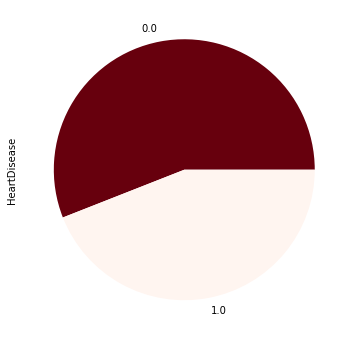

In [21]:
df.groupby('Sex')['HeartDisease'].count().plot(kind='pie',figsize=(10,6),cmap="Reds_r")

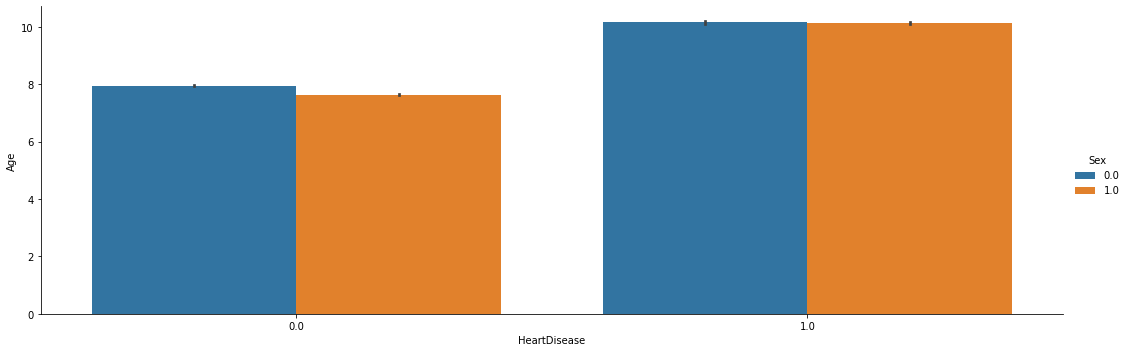

In [22]:
sns.catplot(x='HeartDisease', y='Age', hue='Sex', data=df, kind='bar',aspect=3)

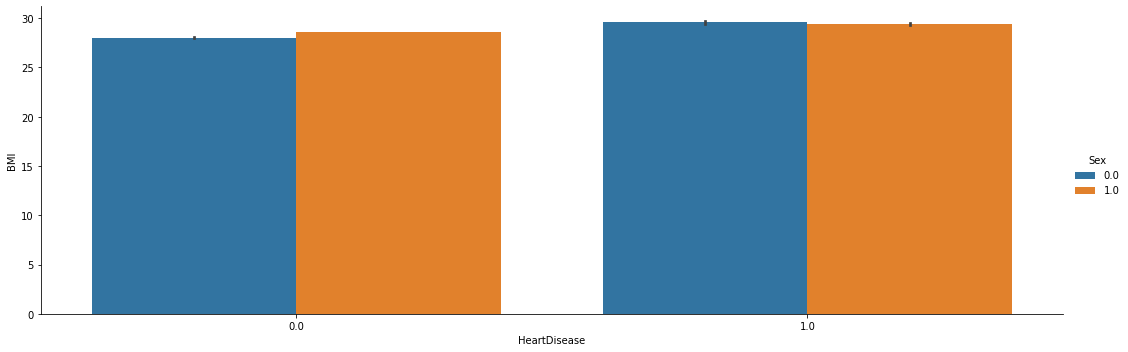

In [23]:
sns.catplot(x='HeartDisease', y='BMI', hue='Sex', data=df, kind='bar',aspect=3)

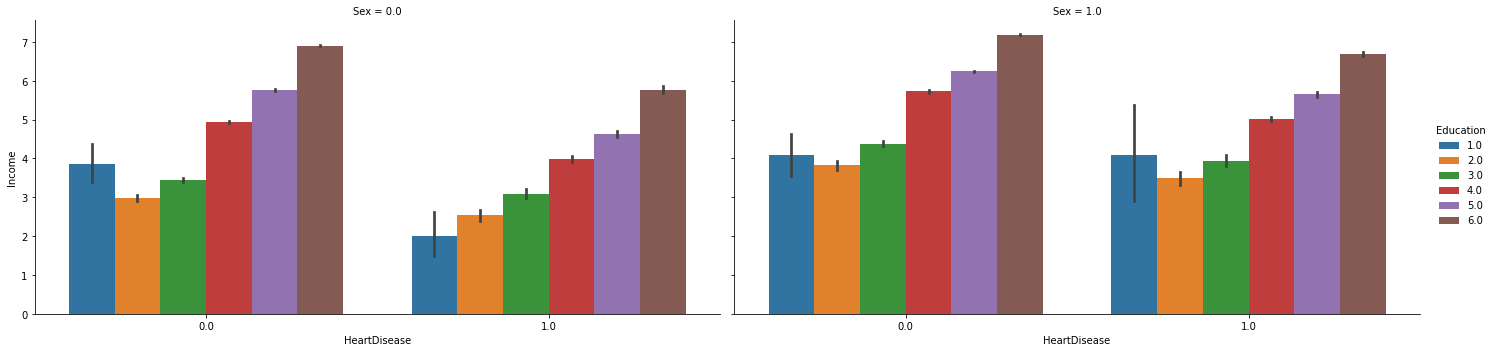

In [24]:
sns.catplot(x='HeartDisease',y='Income',hue='Education',col='Sex',\
               data=df,kind='bar',aspect=2)

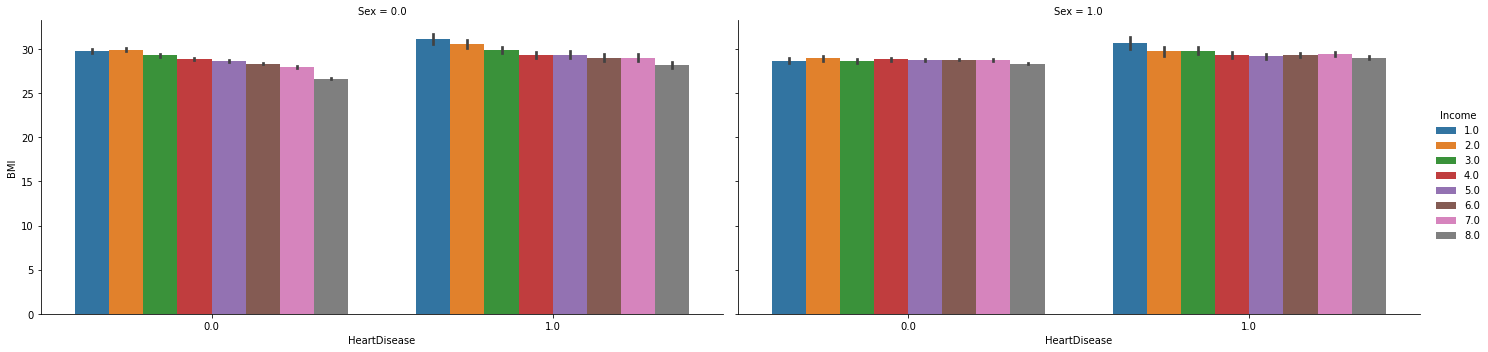

In [25]:
sns.catplot(x='HeartDisease',y='BMI',hue='Income',col='Sex',\
               data=df,kind='bar',aspect=2)

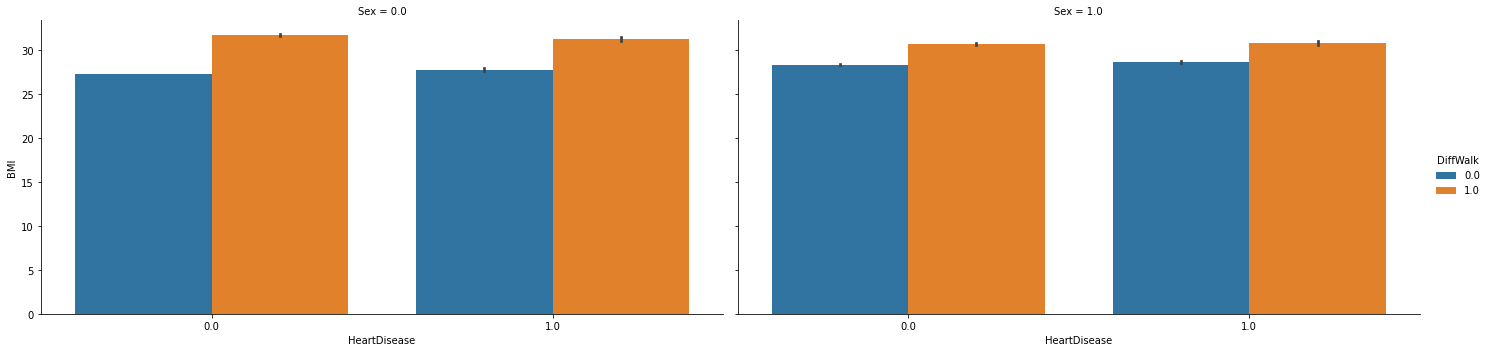

In [26]:
sns.catplot(x='HeartDisease',y='BMI',hue='DiffWalk',col='Sex',\
               data=df,kind='bar',aspect=2)

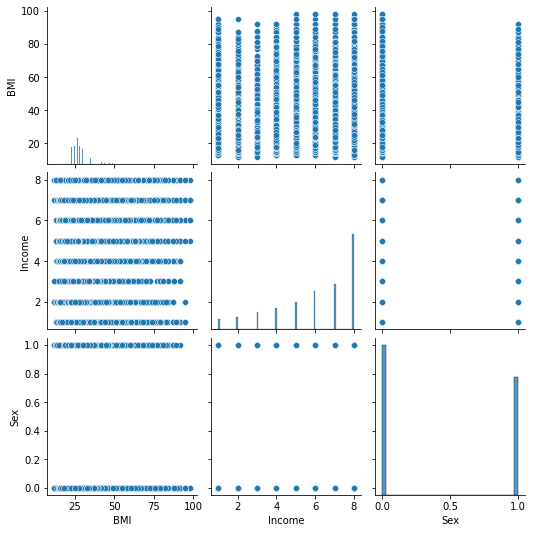

In [27]:
sns.pairplot(df[['BMI','Income','Sex']])

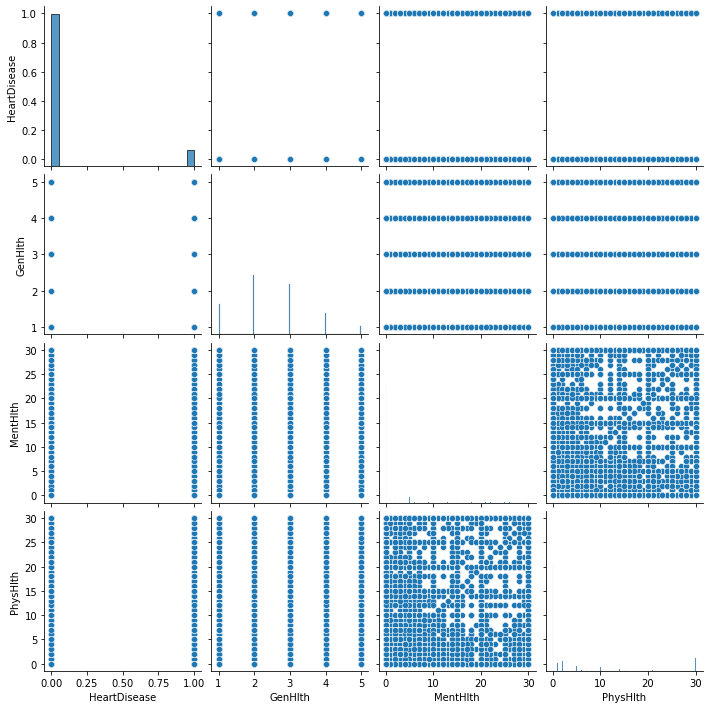

In [28]:
sns.pairplot(df[['HeartDisease','GenHlth','MentHlth','PhysHlth']])

### Feature Engineering

### Classification Models

In [29]:
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [30]:
df_ml = df.copy()

In [31]:
df_ml.head()

,HeartDisease,HighBP,HighChol,CholCheck,BMI,Smoke,Stroke,Diabetes,PhysActivity,Fruits,Veggies,Alcohol,Healthcare,DocCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.00,1.00,1.00,1.00,40.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,5.00,18.00,15.00,1.00,0.00,9.00,4.00,3.00
1,0.00,0.00,0.00,0.00,25.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,3.00,0.00,0.00,0.00,0.00,7.00,6.00,1.00
2,0.00,1.00,1.00,1.00,28.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,5.00,30.00,30.00,1.00,0.00,9.00,4.00,8.00
3,0.00,1.00,0.00,1.00,27.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,2.00,0.00,0.00,0.00,0.00,11.00,3.00,6.00
4,0.00,1.00,1.00,1.00,24.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,2.00,3.00,0.00,0.00,0.00,11.00,5.00,4.00


In [32]:
df_ml.shape

(253680, 22)

In [33]:
df_ml.isna().sum()

HeartDisease    0
HighBP          0
HighChol        0
CholCheck       0
BMI             0
Smoke           0
Stroke          0
Diabetes        0
PhysActivity    0
Fruits          0
Veggies         0
Alcohol         0
Healthcare      0
DocCost         0
GenHlth         0
MentHlth        0
PhysHlth        0
DiffWalk        0
Sex             0
Age             0
Education       0
Income          0
dtype: int64

#### Feature Description

<i>HighBP</i> 
Whether the invidual has High BP or not

<i>HighChol</i> 
Whether the invidual has High Cholesterol or not

<i>CholCheck</i> 
Whether the invidual has got Choleterol levels checked or not

<i>BMI</i> 
BMI level of the individual

<i>Smoke</i>
Whether the individual smokes or not

<i>Stroke</i>
Whether the individual has ever had a heart stroke or not
          
<i>Diabetes</i>
Whether the individual has diabetes or not

<i>PhysActivity</i>
Whether the individual is physically active or not

<i>Fruits</i>
Whether the individual consumes fruits or not

<i>Veggies</i>
Whether the individual consumes vegetables or not

<i>Alcohol</i>
Whether the individual consumes alcohol or not

<i>Healthcare</i>
Whether the individual has any healthcare plan or not

<i>DocCost</i>
Whether the individual has incurred any expenses for doctor visit or not

<i>GenHlth</i>
Rating of the individual's General Health

<i>MentHlth</i>
Rating of the individual's Mental Health

<i>PhysHlth</i>
Rating of the individual's Physical Health

<i>DiffWalk</i>
Whether the individual faces any difficulty in walking or not

<i>Sex</i>
Sex of the individual

<i>Age</i>
Age of the individual

<i>Education</i>
Educational qualification of the individual

<i>Income</i>
Income of the individual

#### Target Variable Description

<i>HeartDisease</i> 
Whether the invidual has suffered from heart disease/attack or not

#### Preprocessing

* Splitting the original data into train-validate set (90%) and test set (10%) using random state = 0. 
* Then, split the train-validate set into training set (80%) and validation set (20%) using random state = 0.
* Splitting out into categorical and numerical features, to preprocess them differently.
* For scikit-learn's implementation, it requires numerical values for it's data matrix. This means all categorical variables needs to be turned into binary features via one-hot encoding.

In [34]:
X = df_ml.drop(columns = 'HeartDisease')
y = df_ml.HeartDisease

In [35]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size = 0.1, stratify = y, random_state = 0)

In [36]:
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, stratify = y_trainval, test_size = 0.2, random_state = 0)

In [37]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   HeartDisease  253680 non-null  float64
 1   HighBP        253680 non-null  float64
 2   HighChol      253680 non-null  float64
 3   CholCheck     253680 non-null  float64
 4   BMI           253680 non-null  float64
 5   Smoke         253680 non-null  float64
 6   Stroke        253680 non-null  float64
 7   Diabetes      253680 non-null  float64
 8   PhysActivity  253680 non-null  float64
 9   Fruits        253680 non-null  float64
 10  Veggies       253680 non-null  float64
 11  Alcohol       253680 non-null  float64
 12  Healthcare    253680 non-null  float64
 13  DocCost       253680 non-null  float64
 14  GenHlth       253680 non-null  float64
 15  MentHlth      253680 non-null  float64
 16  PhysHlth      253680 non-null  float64
 17  DiffWalk      253680 non-null  float64
 18  Sex 

In [38]:
#Splitting out into categorical and numerical features, to preprocess them differently.
col_cat = ['HighBP', 'HighChol', 'CholCheck', 'Smoke', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',\
           'Alcohol', 'Healthcare', 'DocCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex']
col_num = ['BMI', 'Age', 'Education', 'Income']

#### Logistic Regression

In [39]:
pipe_cat = make_pipeline(SimpleImputer(strategy = 'constant'), OneHotEncoder(handle_unknown = 'ignore'))
pipe_num = make_pipeline(StandardScaler(), SimpleImputer())

In [40]:
preprocessor = make_column_transformer((pipe_cat, col_cat), (pipe_num, col_num))

In [41]:
pipe_lrs = Pipeline([('preprocessing', preprocessor), ('classifier', LogisticRegression(random_state = 0, solver = 'lbfgs'))])

In [42]:
param_grid = {'classifier__max_iter': [1000, 10000, 100000]}
grid_lrs = GridSearchCV(pipe_lrs, param_grid = param_grid, cv = 5, n_jobs = -1, return_train_score = True)
grid_lrs.fit(X_train, y_train)
grid_lrs.best_params_

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='constant')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['HighBP',
                                                                          'HighChol',
                                                                          'CholCheck',
                                                                          'Smoke',
                       

{'classifier__max_iter': 1000}

In [45]:
accuracy_lr = grid_lrs.score(X_test,y_test)
print("Best cross-validation score: {:.3f}".format(grid_lrs.best_score_))
print('Accuracy score of the {} is {:.3f}'.format(grid_lrs.__class__.__name__, accuracy_lr))

Best cross-validation score: 0.908
Accuracy score of the GridSearchCV is 0.907


In [46]:
#tuning parameters
param_grid = {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_lrs = GridSearchCV(pipe_lrs, param_grid = param_grid, cv = 5, n_jobs = -1, return_train_score = True)
grid_lrs.fit(X_train, y_train)

grid_lrs.best_params_

/Users/snehabatchu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/snehabatchu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

/Users/snehabatchu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/snehabatchu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='constant')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['HighBP',
                                                                          'HighChol',
                                                                          'CholCheck',
                                                                          'Smoke',
                       

{'classifier__C': 0.001}

In [49]:
accuracy_lr = grid_lrs.score(X_test,y_test)
print("Best cross-validation score: {:.3f}".format(grid_lrs.best_score_))
print('Accuracy score of the {} is {:.3f}'.format(grid_lrs.__class__.__name__, accuracy_lr))

Best cross-validation score: 0.908
Accuracy score of the GridSearchCV is 0.907


In [50]:
accuracy_lr = grid_lrs.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.907481866918953


In [51]:
lr_pred= grid_lrs.predict(X_test)
report_lr = classification_report(y_test,lr_pred)
print(report_lr)

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     22979
         1.0       0.56      0.08      0.14      2389

    accuracy                           0.91     25368
   macro avg       0.74      0.54      0.55     25368
weighted avg       0.88      0.91      0.87     25368



<Figure size 576x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'LOGISTIC REGRESSION CONFUSION MATRIX')

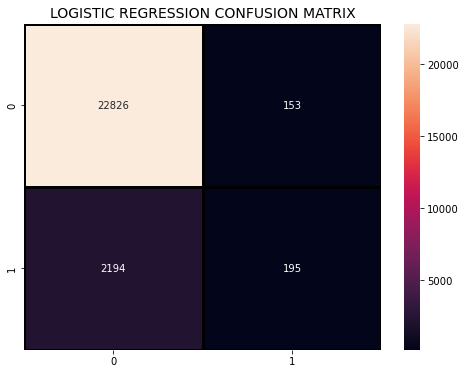

In [52]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

#### Linear Support Vector (SVC)

In [53]:
pipe_svcs = Pipeline([('preprocessing', preprocessor), ('classifier', LinearSVC(random_state = 0))])

In [54]:
param_grid = {'classifier__max_iter': [100, 1000, 10000]}
grid_svcs = GridSearchCV(pipe_svcs, param_grid = param_grid, cv = 5, n_jobs = -1, return_train_score = True)
grid_svcs.fit(X_train, y_train)
grid_svcs.best_params_

/Users/snehabatchu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/snehabatchu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/snehabatchu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/snehabatchu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/snehabatchu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.p

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='constant')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['HighBP',
                                                                          'HighChol',
                                                                          'CholCheck',
                                                                          'Smoke',
                       

{'classifier__max_iter': 1000}

In [55]:
print("Best cross-validation score: {:.3f}".format(grid_svcs.best_score_))
print('Accuracy score of the {} is {:.3f}'.format(grid_svcs.__class__.__name__, accuracy_lr))

Best cross-validation score: 0.908
Accuracy score of the GridSearchCV is 0.907


In [56]:
#tuning parameters
param_grid = {'classifier__C': [0.0001, 0.001, 0.01, 0.1, 1.0]}
grid_svcs = GridSearchCV(pipe_svcs, param_grid = param_grid, cv = 5, n_jobs = -1, return_train_score = True)
grid_svcs.fit(X_train, y_train)

grid_svcs.best_params_

/Users/snehabatchu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/snehabatchu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/snehabatchu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/snehabatchu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/snehabatchu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.p

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='constant')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['HighBP',
                                                                          'HighChol',
                                                                          'CholCheck',
                                                                          'Smoke',
                       

{'classifier__C': 0.1}

In [57]:
accuracy_svc = grid_svcs.score(X_test,y_test)
print("Best cross-validation score: {:.3f}".format(grid_svcs.best_score_))
print('Accuracy score of the {} is {:.3f}'.format(grid_svcs.__class__.__name__, accuracy_svc))

Best cross-validation score: 0.908
Accuracy score of the GridSearchCV is 0.907


In [58]:
predict_svc = grid_svcs.predict(X_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.9072059287291075


In [59]:
print(classification_report(y_test, predict_svc))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     22979
         1.0       0.58      0.05      0.09      2389

    accuracy                           0.91     25368
   macro avg       0.75      0.52      0.52     25368
weighted avg       0.88      0.91      0.87     25368



#### k-nearest neighbors

In [60]:
pipe_knns = Pipeline([('preprocessing', preprocessor), ('classifier', KNeighborsClassifier())])

In [ ]:
param_grid = {'classifier__n_neighbors': range(1,20)}
grid_knns = GridSearchCV(pipe_knns, param_grid = param_grid, cv = 5, n_jobs = -1, return_train_score = True)
grid_knns.fit(X_train, y_train)
grid_knns.best_params_

In [ ]:
accuracy = grid_knns.score(X_test, y_test)
print("Best cross-validation score: {:.3f}".format(grid_knns.best_score_))
print('Accuracy score of the {} is {:.3f}'.format(grid_knns.__class__.__name__, accuracy))

In [ ]:
predict_knn = grid_knns.predict(X_test)
accuracy_knn = grid_knns.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

In [ ]:
print(classification_report(y_test, predict_knn))

#### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
pipe_cat = make_pipeline(SimpleImputer(strategy = 'constant'), OneHotEncoder(handle_unknown = 'ignore'))
pipe_num = make_pipeline(StandardScaler(), SimpleImputer())

In [ ]:
preprocessor3 = make_column_transformer((pipe_cat, col_cat), (pipe_num, col_num))

In [ ]:
pipe_rf = Pipeline([('preprocessing', preprocessor3), ('classifier', RandomForestClassifier())])

In [ ]:
param_grid = {'classifier__max_features': [2, 4, 6, 8, 10],
              'classifier__max_depth': [6, 8, 10, 12, 14]}

In [ ]:
grid_rf = GridSearchCV(pipe_rf, param_grid = param_grid, cv = 5, return_train_score=True)
grid_rf.fit(X_trainval, y_trainval)

grid_rf.best_params_

In [ ]:
accuracy_rf = grid_rf.score(X_test, y_test)
print('Accuracy score of the {} is {:.3f}'.format(grid_rf.__class__.__name__, accuracy))

In [ ]:
predict_rf = grid_rf.predict(X_test)
print (metrics.accuracy_score(y_test, predict_rf))

In [ ]:
print(classification_report(y_test, predict_rf))

#### Scores of all models

### Final Evaluation